In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

In [3]:
dfx = pd.read_csv("weightedX.csv")
dfy = pd.read_csv("weightedY.csv")
X = dfx.values
Y = dfy.values
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


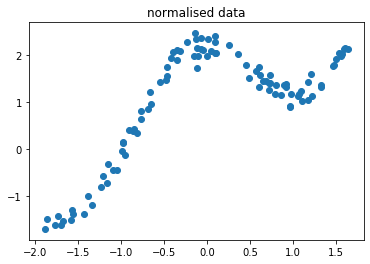

In [4]:
# normalise
u = X.mean()
std = X.std()
X = (X-u)/std
plt.title("normalised data")
plt.scatter(X,Y)
plt.show()

# find w / diagonal matrix

In [33]:
def getW(query_point,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    for i in range(M):
        W[i,i] = np.exp(np.dot((X[i]-query_point),(X[i]-query_point).T)/(-2*tau*tau))
    return W

In [34]:
X = np.mat(X)
Y = np.mat(Y)
M = X.shape[0]
W = getW(1,X,0.5)

print(W.shape)
print(W)
#increasing tau will give more like linear regression problem

(99, 99)
[[0.02514305 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00134876 0.         ... 0.         0.         0.        ]
 [0.         0.         0.0254935  ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.14184306 0.         0.        ]
 [0.         0.         0.         ... 0.         0.73193404 0.        ]
 [0.         0.         0.         ... 0.         0.         0.9072765 ]]


 ## Make Predictions

In [35]:
def predict(X,Y,query_x,tau):
    
    ones = np.ones((M,1))
    X_ = np.hstack((X,ones)) 
    qx = np.mat([query_x,1])
    W = getW(qx,X_,tau)
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred = np.dot(qx,theta)
    return theta,pred
    

In [36]:
theta,pred = predict(X,Y,1.0,1.0)

In [37]:
print(theta.shape)

(2, 1)


## Visualise predictions/ analyse effect of tau

In [38]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color ="red")
    plt.show()
    
        

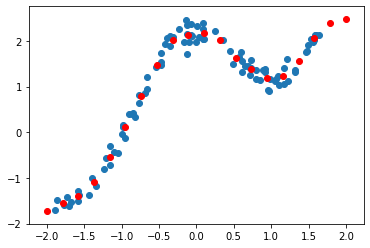

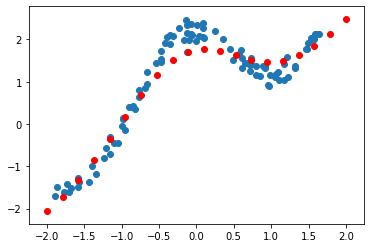

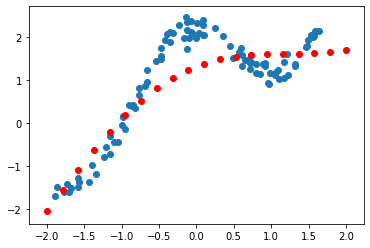

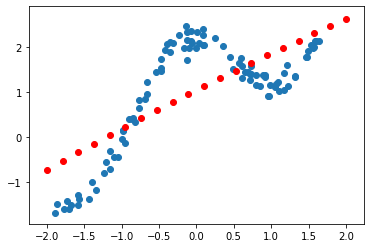

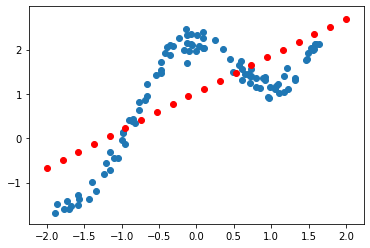

In [39]:
taus = (0.1,0.5,1,5,10)
for t in taus:
    plotPrediction(t)